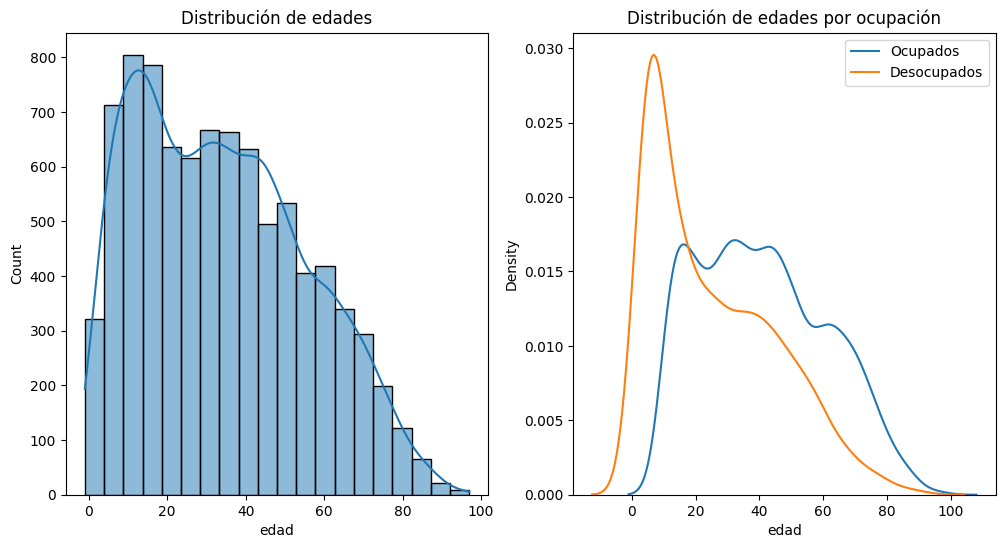

La distribución de edades muestra una forma aproximadamente normal, con una mayor concentración de personas en edades laborales activas. La distribución de kernels para ocupados y desocupados muestra que los ocupados tienden a tener una edad ligeramente mayor que los desocupados.


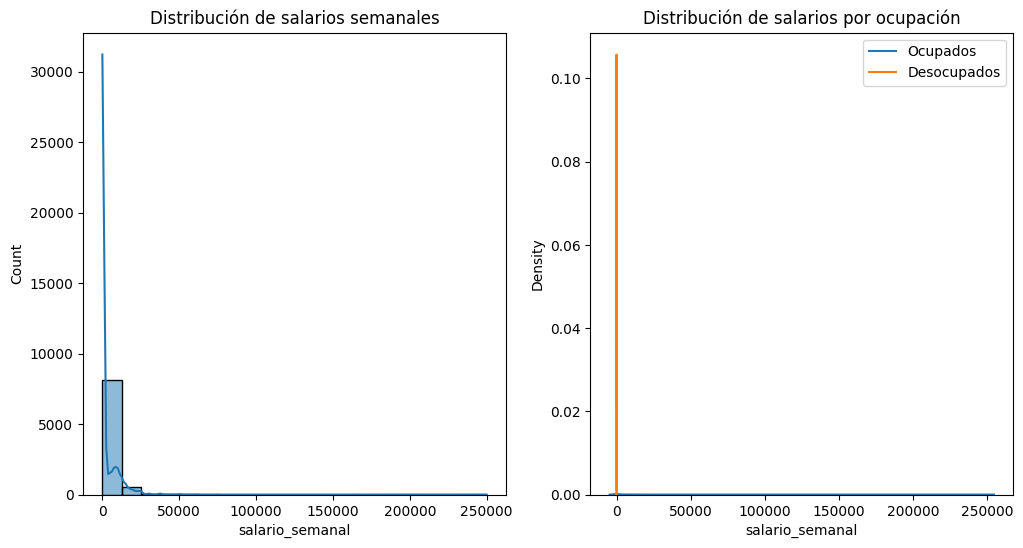

La distribución de salarios semanales muestra una forma sesgada a la derecha, con una mayor concentración de personas en salarios más bajos. La distribución de kernels para ocupados y desocupados muestra que los ocupados tienden a tener salarios más altos que los desocupados.
count    5671.000000
mean       24.114618
std        23.897088
min         0.000000
25%         0.000000
50%        24.000000
75%        42.000000
max       126.000000
Name: horastrab, dtype: float64
La variable horastrab muestra un promedio de 24.114618233115852 horas trabajadas, con una desviación estándar de 23.897087918006456. El mínimo es 0.0 horas y el máximo es 126.0 horas.
         Año  Número de filas (observaciones)  \
0  Unificada                             8791   

   Número de columnas (variables originales)  
0                                        348  
La base de datos unificada tiene 8791 filas y 348 columnas.


C:\Users\choco\AppData\Local\Temp\ipykernel_17876\894666590.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  base_unificada['horastrab'] = base_unificada['PP3E_TOT'] + base_unificada['PP3F_TOT']


In [5]:
#parte 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datos1 = pd.read_stata("C:\\Users\\choco\\Downloads\\patagonia_t104.dta")
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:].copy()
datos2 = pd.read_excel("C:\\Users\\choco\\Downloads\\usu_individual_T124.xlsx")
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:].copy()

# Unificar los conjuntos de datos

patagonia1['ano'] = 2004  # Suponiendo que este es el año para patagonia1
patagonia2['ano'] = 2024  # Suponiendo que este es el año para patagonia2

# Renombrar columnas para unificarlas
patagonia1 = patagonia1.rename(columns={'ch06': 'edad', 'h15': 'ocupacion'})
patagonia2 = patagonia2.rename(columns={'CH06': 'edad', 'H15': 'ocupacion'})

# Unificar los conjuntos de datos
base_unificada = pd.concat([patagonia1, patagonia2], ignore_index=True)

# Convertir edad a numérico
base_unificada['edad'] = pd.to_numeric(base_unificada['edad'], errors='coerce')
base_unificada = base_unificada.dropna(subset=['edad'])

# 1. Edad al cuadrado y distribución de edades
base_unificada['edad2'] = base_unificada['edad'] ** 2

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(base_unificada['edad'], bins=20, kde=True)
plt.title('Distribución de edades')

plt.subplot(1,2,2)
sns.kdeplot(base_unificada[base_unificada['ocupacion'] == 1]['edad'], label='Ocupados')
sns.kdeplot(base_unificada[base_unificada['ocupacion'] != 1]['edad'], label='Desocupados')
plt.title('Distribución de edades por ocupación')
plt.legend()
plt.show()

print(f"La distribución de edades muestra una forma aproximadamente normal, con una mayor concentración de personas en edades laborales activas. La distribución de kernels para ocupados y desocupados muestra que los ocupados tienden a tener una edad ligeramente mayor que los desocupados.")

# 2. Años de educación (suponiendo que no hay información sobre educación en los datos)
# Si hay información sobre educación, por favor proporciona las columnas correspondientes

# 3. Salario semanal (suponiendo que la columna es 'p21' en patagonia1 y 'P21' en patagonia2)
patagonia1 = patagonia1.rename(columns={'p21': 'P21'})
base_unificada = pd.concat([patagonia1, patagonia2], ignore_index=True)

indice_conversion = 1 # Reemplazar con el índice de conversión real
base_unificada['salario_semanal'] = np.where(base_unificada['ano'] == 2004, base_unificada['P21'] / indice_conversion, base_unificada['P21']) / 40

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(base_unificada['salario_semanal'], bins=20, kde=True)
plt.title('Distribución de salarios semanales')

plt.subplot(1,2,2)
sns.kdeplot(base_unificada[base_unificada['ocupacion'] == 1]['salario_semanal'], label='Ocupados')
sns.kdeplot(base_unificada[base_unificada['ocupacion'] != 1]['salario_semanal'], label='Desocupados')
plt.title('Distribución de salarios por ocupación')
plt.legend()
plt.show()

print(f"La distribución de salarios semanales muestra una forma sesgada a la derecha, con una mayor concentración de personas en salarios más bajos. La distribución de kernels para ocupados y desocupados muestra que los ocupados tienden a tener salarios más altos que los desocupados.")

# 4. Horas trabajadas (suponiendo que las columnas son 'pp3e_tot' y 'pp3f_tot' en patagonia1 y 'PP3E_TOT' y 'PP3F_TOT' en patagonia2)
patagonia1 = patagonia1.rename(columns={'pp3e_tot': 'PP3E_TOT', 'pp3f_tot': 'PP3F_TOT'})
base_unificada = pd.concat([patagonia1, patagonia2], ignore_index=True)

base_unificada['horastrab'] = base_unificada['PP3E_TOT'] + base_unificada['PP3F_TOT']

print(base_unificada['horastrab'].describe())
print(f"La variable horastrab muestra un promedio de {base_unificada['horastrab'].mean()} horas trabajadas, con una desviación estándar de {base_unificada['horastrab'].std()}. El mínimo es {base_unificada['horastrab'].min()} horas y el máximo es {base_unificada['horastrab'].max()} horas.")

# 5. Tamaño de la base de datos

tabla_tamaño = pd.DataFrame({
    'Año': ['Unificada'],
    'Número de filas (observaciones)': [len(base_unificada)],
    'Número de columnas (variables originales)': [len(base_unificada.columns)]
})
print(tabla_tamaño)
print(f"La base de datos unificada tiene {len(base_unificada)} filas y {len(base_unificada.columns)} columnas.")